In [1]:
#importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Reading CSV file
data = pd.read_csv(r"/content/emails.csv")
data

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [3]:
data.shape

(5728, 2)

In [4]:
data = data.sample(frac = 1)

In [5]:
data.tail(10)

,text,spam
2728,"Subject: ebs stinson , the spreadsheet below...",0
3389,"Subject: li sun vince , thanks for your resp...",0
1857,Subject: site license for power world gentlem...,0
328,Subject: just to her . . . your message to tj...,1
3830,Subject: exotica ( yet again ) hi guys i nee...,0
2528,Subject: re : enron / stanford program stinso...,0
690,Subject: we will guide you thru all of the ans...,1
58,Subject: did you complete this ? free service...,1
2902,Subject: interview schedules for tony hamilton...,0
3684,Subject: projects completed and work in progre...,0


Steps we will be following:
 1. Data cleaning(removing NaN in rows)
 2. Data Analysis
 3. Text Preprocessing(Vectorization,stemming,removing stopwords and many more)
 4. Model Building
 5. Evaluation
 6. Improvement

# 1. Data Cleaning

In [6]:
#Gives information about how many value sare null and  not null.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5728 entries, 3244 to 3684
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 134.2+ KB


In [7]:
#dropping columns if any of the column would be having NaN values
#data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [8]:
data.head(10)

,text,spam
3244,Subject: summary of dabhol lenders ' presentat...,0
5232,"Subject: re : boss ' s day kevin , no proble...",0
2380,"Subject: re : yes sir jeff , thanks . we sh...",0
703,"Subject: the man of stteel hello , welcome to...",1
430,Subject: you don _ t know how to attract custo...,1
5640,Subject: re : 7 / 14 - - crude oil and nat gas...,0
5701,Subject: rendez - vous reporter : sunday 3 rd ...,0
4683,Subject: interview with the enron corp . resea...,0
4985,Subject: research seminar vince has asked tha...,0
3056,"Subject: warning system greg , as a follow u...",0


In [9]:
#renaming the columns
data.rename(columns={'spam':'target'},inplace=True)

In [10]:
data

,text,target
3244,Subject: summary of dabhol lenders ' presentat...,0
5232,"Subject: re : boss ' s day kevin , no proble...",0
2380,"Subject: re : yes sir jeff , thanks . we sh...",0
703,"Subject: the man of stteel hello , welcome to...",1
430,Subject: you don _ t know how to attract custo...,1
...,...,...
2528,Subject: re : enron / stanford program stinso...,0
690,Subject: we will guide you thru all of the ans...,1
58,Subject: did you complete this ? free service...,1
2902,Subject: interview schedules for tony hamilton...,0


In [11]:
#checking missing values
data.isnull().sum()

text      0
target    0
dtype: int64

In [12]:
#checking for duplicate values
data.duplicated().sum()

33

In [13]:
#drop duplicates
data=data.drop_duplicates(keep='first')

In [16]:
data.duplicated().sum()

0

In [17]:
#initially there were 5728 rows and 2 columns.
data.shape

(5695, 2)

# Data Analysis
understanding the data.

In [18]:
#check total spam(1)
data['target'].value_counts()

0    4327
1    1368
Name: target, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

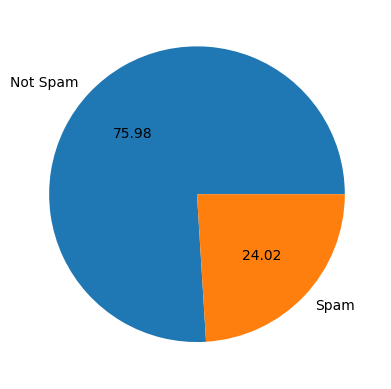

In [19]:
#plotting piechart
plt.pie(data['target'].value_counts(),labels=['Not Spam','Spam'],autopct="%0.2f")
plt.show

 Data is imbalanced
-there is huge not spam and very less spam

In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [22]:
#creating new column whoch tells count of number of characters in each mail
text=data['text']

In [23]:
no_characters=text.apply(len)

In [24]:
no_characters

3244     702
5232    1582
2380     700
703      424
430      909
        ... 
2528    1080
690      210
58       354
2902     420
3684    1133
Name: text, Length: 5695, dtype: int64

In [25]:
data['no_characters']=no_characters

<ipython-input-25-e052e956b00f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['no_characters']=no_characters


In [26]:
data

,text,target,no_characters
3244,Subject: summary of dabhol lenders ' presentat...,0,702
5232,"Subject: re : boss ' s day kevin , no proble...",0,1582
2380,"Subject: re : yes sir jeff , thanks . we sh...",0,700
703,"Subject: the man of stteel hello , welcome to...",1,424
430,Subject: you don _ t know how to attract custo...,1,909
...,...,...,...
2528,Subject: re : enron / stanford program stinso...,0,1080
690,Subject: we will guide you thru all of the ans...,1,210
58,Subject: did you complete this ? free service...,1,354
2902,Subject: interview schedules for tony hamilton...,0,420


In [27]:
#creating another column which counts number of words in each mail
data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

3244    129
5232    397
2380    197
703      71
430     232
       ... 
2528    225
690      40
58       64
2902     73
3684    229
Name: text, Length: 5695, dtype: int64

In [28]:
data['no_word']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-28-0fe75d47f847>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['no_word']=data['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [29]:
data

,text,target,no_characters,no_word
3244,Subject: summary of dabhol lenders ' presentat...,0,702,129
5232,"Subject: re : boss ' s day kevin , no proble...",0,1582,397
2380,"Subject: re : yes sir jeff , thanks . we sh...",0,700,197
703,"Subject: the man of stteel hello , welcome to...",1,424,71
430,Subject: you don _ t know how to attract custo...,1,909,232
...,...,...,...,...
2528,Subject: re : enron / stanford program stinso...,0,1080,225
690,Subject: we will guide you thru all of the ans...,1,210,40
58,Subject: did you complete this ? free service...,1,354,64
2902,Subject: interview schedules for tony hamilton...,0,420,73


In [30]:
#creating another column which counts number of sentences in each mail
data['no_sentence']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-30-291fb3aa4a03>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['no_sentence']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [31]:
data

,text,target,no_characters,no_word,no_sentence
3244,Subject: summary of dabhol lenders ' presentat...,0,702,129,4
5232,"Subject: re : boss ' s day kevin , no proble...",0,1582,397,21
2380,"Subject: re : yes sir jeff , thanks . we sh...",0,700,197,15
703,"Subject: the man of stteel hello , welcome to...",1,424,71,3
430,Subject: you don _ t know how to attract custo...,1,909,232,11
...,...,...,...,...,...
2528,Subject: re : enron / stanford program stinso...,0,1080,225,11
690,Subject: we will guide you thru all of the ans...,1,210,40,4
58,Subject: did you complete this ? free service...,1,354,64,9
2902,Subject: interview schedules for tony hamilton...,0,420,73,6


#### spam


In [32]:
data[data['target']==1][['no_characters','no_word','no_sentence']].describe()

,no_characters,no_word,no_sentence
count,1368.000000,1368.000000,1368.000000
mean,1317.257310,267.896199,18.274123
std,2271.372893,451.623124,28.130434
min,18.000000,5.000000,1.000000
25%,401.500000,80.000000,6.000000
50%,693.500000,141.000000,11.000000
75%,1250.250000,252.000000,18.000000
max,28432.000000,6131.000000,438.000000


#### not spam

In [33]:
data[data['target']==0][['no_characters','no_word','no_sentence']].describe()

,no_characters,no_word,no_sentence
count,4327.000000,4327.000000,4327.000000
mean,1634.200139,347.283799,19.838225
std,1965.016383,407.227757,38.124564
min,13.000000,3.000000,1.000000
25%,577.500000,120.000000,7.000000
50%,1122.000000,240.000000,13.000000
75%,2037.500000,440.500000,22.000000
max,43952.000000,8479.000000,1565.000000


In [35]:
#plotting histogram for spam and not spam
import seaborn as sns

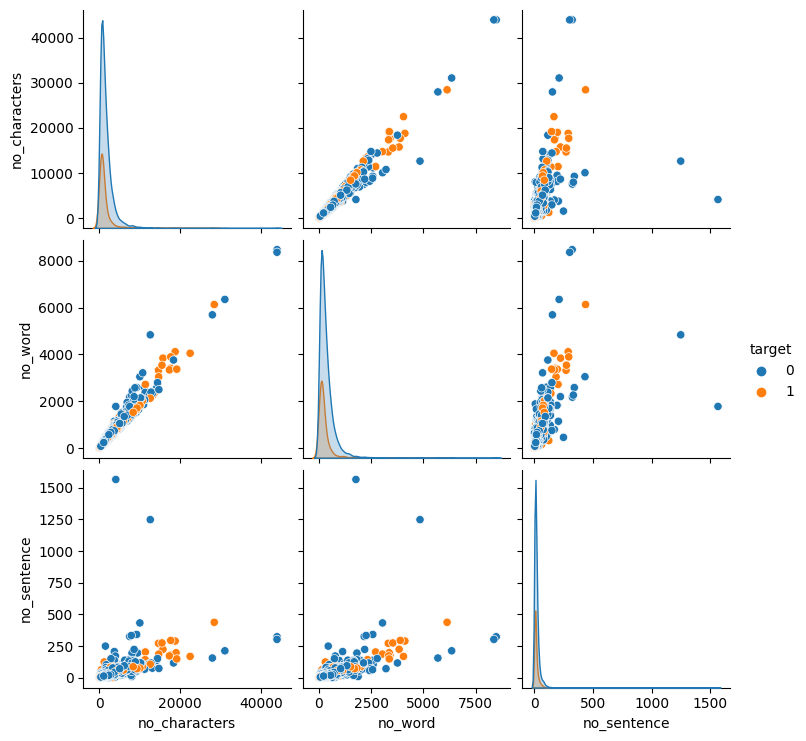

In [36]:
sns.pairplot(data,hue='target')

# Data Preprocessing
1. Lower case
2. Tokenization
3. Removing special characters
4. Removing stopwords and punctuation
5. Stemming

In [37]:
#nltk.download('stopwords')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
#creating a function. we will perform all operations in one go.
def translate(text):
    text=text.lower()      #lower case
    text=nltk.word_tokenize(text)       #word tokenize
    y=[]                   #removing special characters
    for i in text:
        if i.isalnum():             #alnum: indicates alpha numeric
            y.append(i)
    text=y[:]                 #list ko clonning kar rahe hai(modifying as well as keeping copy of original content))
    y.clear()
    
    for i in text:                      ##removing stopwords and punctuation(has no role in senetence meaning but only in senetence formation)
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(p.stem(i))
        
    
        
    
    return " ".join(y)
#to make a string while returning

In [40]:
from nltk.stem.porter import PorterStemmer
p=PorterStemmer()
p.stem('naming')


'name'

In [41]:
translate('hey!!,My Name is Nikhil...How are you doing????')

'hey name nikhil'

In [42]:
data['translated_words']=data['text'].apply(translate)

<ipython-input-42-2fe254882521>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['translated_words']=data['text'].apply(translate)


In [43]:
data.head(5)

,text,target,no_characters,no_word,no_sentence,translated_words
3244,Subject: summary of dabhol lenders ' presentat...,0,702,129,4,subject summari dabhol lender present vinc sti...
5232,"Subject: re : boss ' s day kevin , no proble...",0,1582,397,21,subject boss day kevin problem good idea pleas...
2380,"Subject: re : yes sir jeff , thanks . we sh...",0,700,197,15,subject ye sir jeff thank shall tri arrang vid...
703,"Subject: the man of stteel hello , welcome to...",1,424,71,3,subject man stteel hello welcom medzonlin dire...
430,Subject: you don _ t know how to attract custo...,1,909,232,11,subject know attract custom websit submit webs...


In [44]:
#!pip install wordcloud(important words ko bada karke dikhyegya)
from wordcloud import WordCloud
w=WordCloud(width=500,height=500)

In [45]:
#word cloud of spam messages
spam_wc=w.generate(data[data['target']==1]['translated_words'].str.cat(sep=" "))

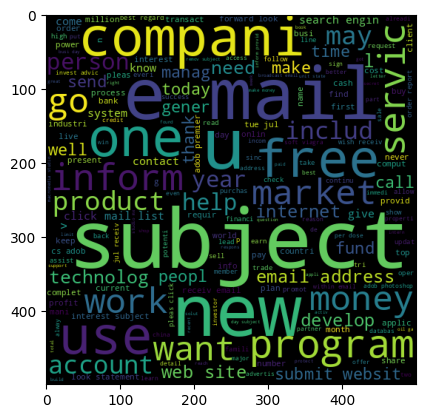

In [46]:
plt.imshow(spam_wc)

In [47]:
#word cloud og non spam meassages
not_spam_wc=w.generate(data[data['target']==0]['translated_words'].str.cat(sep=" "))

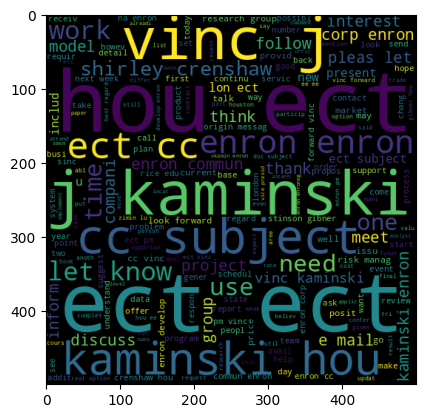

In [48]:
plt.imshow(not_spam_wc)

In [49]:
data = data.sample(frac = 1)

In [50]:
 data[data['target']==1]['translated_words'].tolist()

['subject 1 500 00 part time 22311 check 1 000 00 internet challeng tab tab b 7 could protect job allow work littl two hour week still pay 800 00 everi week next 20 year well take 1 000 00 onlin challeng tab tab tab tab tab tab check tab tab tab tab tab tab tab tab tab tab tab sender messag state assur sender compli state guidelin code regard uce transmitt specif intend resid state washington wish opt receiv messag futur pleas href http www bti market net remov html click enter email address thank posit assist',
 'subject bro check awesom new product wish could better http www gretan com ss cheer mind vigor mind war god way teach american geographi human power compound time patienc strive excel perfect kill lost import part life',
 'subject juli invit free webcam hi sweet juli cutey person servic hear say hi want check websit read southern accent drive wild see intim moment life wait hear cutey tti http ownedboon com ju 43',
 'subject deal medic hello carl mayo question satisfi sexual 

In [51]:
#most used top 30 owrds in spam
spam=[]
for message in  data[data['target']==1]['translated_words'].tolist():
    for words in message.split():
        spam.append(words)

In [52]:
from collections import Counter
Counter(spam).most_common(40)


[('subject', 1577),
 ('compani', 1065),
 ('com', 1000),
 ('1', 952),
 ('mail', 917),
 ('busi', 897),
 ('email', 865),
 ('inform', 818),
 ('receiv', 727),
 ('e', 701),
 ('get', 694),
 ('5', 687),
 ('money', 662),
 ('pleas', 619),
 ('2', 613),
 ('free', 606),
 ('3', 604),
 ('http', 603),
 ('make', 603),
 ('market', 600),
 ('time', 593),
 ('one', 592),
 ('000', 560),
 ('click', 552),
 ('use', 546),
 ('order', 541),
 ('invest', 540),
 ('us', 537),
 ('offer', 528),
 ('secur', 520),
 ('report', 507),
 ('websit', 506),
 ('new', 504),
 ('list', 503),
 ('price', 503),
 ('may', 489),
 ('adob', 462),
 ('address', 461),
 ('site', 455),
 ('0', 450)]

# MODEL BUILDING

In [53]:
#converting text to vector form
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=2800)

In [54]:
#X=cv.fit_transform(data['translated_words']).toarray()
X=tfidf.fit_transform(data['translated_words']).toarray()

In [55]:
X

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.0785021, 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

In [56]:
y=data['target'].values

In [57]:
y

array([0, 0, 0, ..., 0, 1, 1])

In [58]:
from sklearn.model_selection import train_test_split


In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [60]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [61]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [62]:
gnb.fit(X_train,y_train)
y_pred01=gnb.predict(X_test)
accuracy_score(y_test,y_pred01)

0.9640035118525022

In [63]:
precision_score(y_test,y_pred01)

0.9657794676806084

In [64]:
mnb.fit(X_train,y_train)
y_pred02=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred02))
precision_score(y_test,y_pred02)

0.9789288849868305


0.9781021897810219

In [65]:
bnb.fit(X_train,y_train)
y_pred03=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred03))
precision_score(y_test,y_pred03)

0.9376646180860404


0.8028169014084507

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier


In [67]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [68]:
#dictionary where keys have algo name and values have key objects
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'GBDT':gbdt,

}

In [69]:
#function which is working on each above mentioned classifier
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [70]:
#Loop on above dictionary
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9833187006145742
Precision -  0.9750889679715302
For  KN
Accuracy -  0.971027216856892
Precision -  0.9702602230483272
For  NB
Accuracy -  0.9789288849868305
Precision -  0.9781021897810219
For  DT
Accuracy -  0.9218612818261633
Precision -  0.7822349570200573
For  LR
Accuracy -  0.9771729587357331
Precision -  0.9676258992805755
For  RF
Accuracy -  0.9736611062335382
Precision -  0.9923076923076923
For  GBDT
Accuracy -  0.9596136962247586
Precision -  0.9724409448818898


svc gives best precision with overall good accuracy

#Model Improvement


In [71]:
#voting classifier(best performing classifiers taken from above)
#it is bascially combination of our classifiers which sometimes perform good.
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)

from sklearn.ensemble import VotingClassifier

In [72]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('dt', dtc)],voting='soft')

In [73]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('dt', DecisionTreeClassifier(max_depth=5))],
                 voting='soft')

In [74]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9929762949956101
Precision 0.9894366197183099


In [75]:
#applying stacking
#here we combine three classifiers and we basically assign weightage according to final estimator 
estimators=[('svm', svc), ('nb', mnb), ('dt', dtc)]
final_estimator=RandomForestClassifier()

In [76]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))